In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Carica il dataset
df = pd.read_csv('only_one_language_country.csv')
#avg_vote,votes

In [112]:
import pandas as pd
import numpy as np


max_votes = df['votes'].max()
bins = np.arange(0, max_votes + 10000, 10000)

# Crea una nuova colonna 'revenue_bin' per categorizzare i dati in base agli intervalli
df['vote_bin'] = pd.cut(df['votes'], bins=bins)

# Conta quanti elementi ci sono in ogni intervallo
revenue_counts = df['vote_bin'].value_counts().sort_index()

for interval, count in revenue_counts.items():
    print(f'{interval}: {count}')

(0, 10000]: 8649
(10000, 20000]: 1972
(20000, 30000]: 1105
(30000, 40000]: 758
(40000, 50000]: 546
(50000, 60000]: 415
(60000, 70000]: 352
(70000, 80000]: 342
(80000, 90000]: 291
(90000, 100000]: 203
(100000, 110000]: 212
(110000, 120000]: 170
(120000, 130000]: 189
(130000, 140000]: 146
(140000, 150000]: 148
(150000, 160000]: 111
(160000, 170000]: 116
(170000, 180000]: 126
(180000, 190000]: 127
(190000, 200000]: 113
(200000, 210000]: 102
(210000, 220000]: 76
(220000, 230000]: 85
(230000, 240000]: 84
(240000, 250000]: 65
(250000, 260000]: 90
(260000, 270000]: 70
(270000, 280000]: 72
(280000, 290000]: 58
(290000, 300000]: 75
(300000, 310000]: 75
(310000, 320000]: 55
(320000, 330000]: 55
(330000, 340000]: 65
(340000, 350000]: 59
(350000, 360000]: 57
(360000, 370000]: 56
(370000, 380000]: 55
(380000, 390000]: 52
(390000, 400000]: 48
(400000, 410000]: 51
(410000, 420000]: 55
(420000, 430000]: 49
(430000, 440000]: 40
(440000, 450000]: 28
(450000, 460000]: 47
(460000, 470000]: 42
(470000, 480

In [120]:
from sklearn.tree import DecisionTreeRegressor

# Funzione per discretizzare la variabile target basata sui valori predetti
def discretize_predictions(y_predicted, num_bins):
    thresholds = np.percentile(y_predicted, np.linspace(0, 100, num_bins + 1))
    bins = np.sort(thresholds)
    y_binned = np.digitize(y_predicted, bins) - 1
    return y_binned, bins

# Numero di bin desiderati
num_bins = 3

# Addestramento di un regressore decisionale per predire i valori della variabile target
regressor = DecisionTreeRegressor(max_leaf_nodes=num_bins, random_state=42)
regressor.fit(df['votes'].values.reshape(-1, 1), df['votes'])

# Predizione dei valori della variabile target
y_predicted = regressor.predict(df['votes'].values.reshape(-1, 1))

# Discretizzazione dei valori predetti
df['cluster_votes'], bins = discretize_predictions(y_predicted, num_bins)
print("Bins:", bins)





Bins: [  183865.71661883   183865.71661883   183865.71661883 10932197.39130435]


C:\Users\BOLO\miniconda3\envs\Business\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1 center: 117903.7075005107
Cluster 2 center: 7961599.3442622945
Cluster 3 center: 2377894.332770264


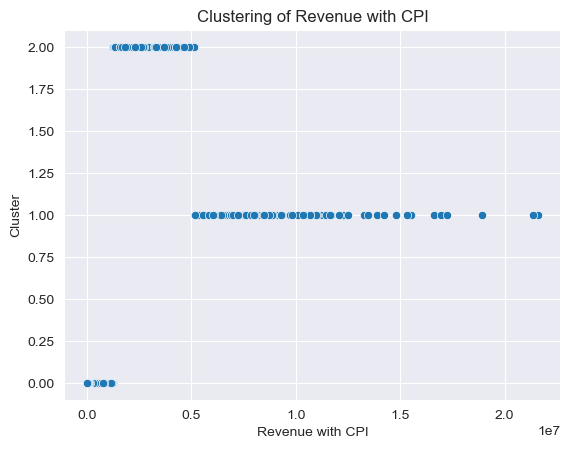

In [113]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# Definisci il numero di cluster
num_clusters = 3

# Applica il k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['vote_cluster'] = kmeans.fit_predict(df[['votes']])

# Esamina i risultati del clustering
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center: {center[0]}")

# Visualizza i risultati
sns.scatterplot(data=df, x='votes', y='vote_cluster')
plt.xlabel('Revenue with CPI')
plt.ylabel('Cluster')
plt.title('Clustering of Revenue with CPI')
plt.show()


Cluster 0:
Mean silhouette: 0.9059413305151516
Number of samples: 19412

Cluster 1:
Mean silhouette: 0.4351302566537517
Number of samples: 183

Cluster 2:
Mean silhouette: 0.48001336360995117
Number of samples: 1184


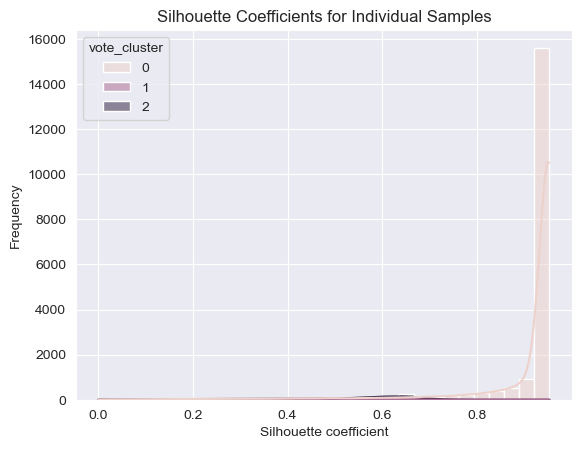

In [114]:
from sklearn.metrics import silhouette_samples

# Calcola la silhouette per ogni campione
silhouette_samples_values = silhouette_samples(df[['votes']], df['vote_cluster'])

# Aggiungi i valori di silhouette come colonna al DataFrame
df['silhouette'] = silhouette_samples_values

# Visualizza le silhouette dei singoli cluster
for cluster in sorted(df['vote_cluster'].unique()):
    cluster_silhouette_values = df[df['vote_cluster'] == cluster]['silhouette']
    print(f"Cluster {cluster}:")
    print("Mean silhouette:", cluster_silhouette_values.mean())
    print("Number of samples:", cluster_silhouette_values.shape[0])
    print("")

# Plot delle silhouette dei singoli campioni
sns.histplot(data=df, x='silhouette', hue='vote_cluster', bins=30, kde=True)
plt.xlabel('Silhouette coefficient')
plt.ylabel('Frequency')
plt.title('Silhouette Coefficients for Individual Samples')
plt.show()

In [105]:
bins = [0, 100000, 500000, 30000000]  # Specifica i tuoi bin qui
labels = ['1','2', '3']  # Etichette per i bin
df['vote_cluster'] = pd.cut(df['votes'], bins=bins, labels=labels, right=False)


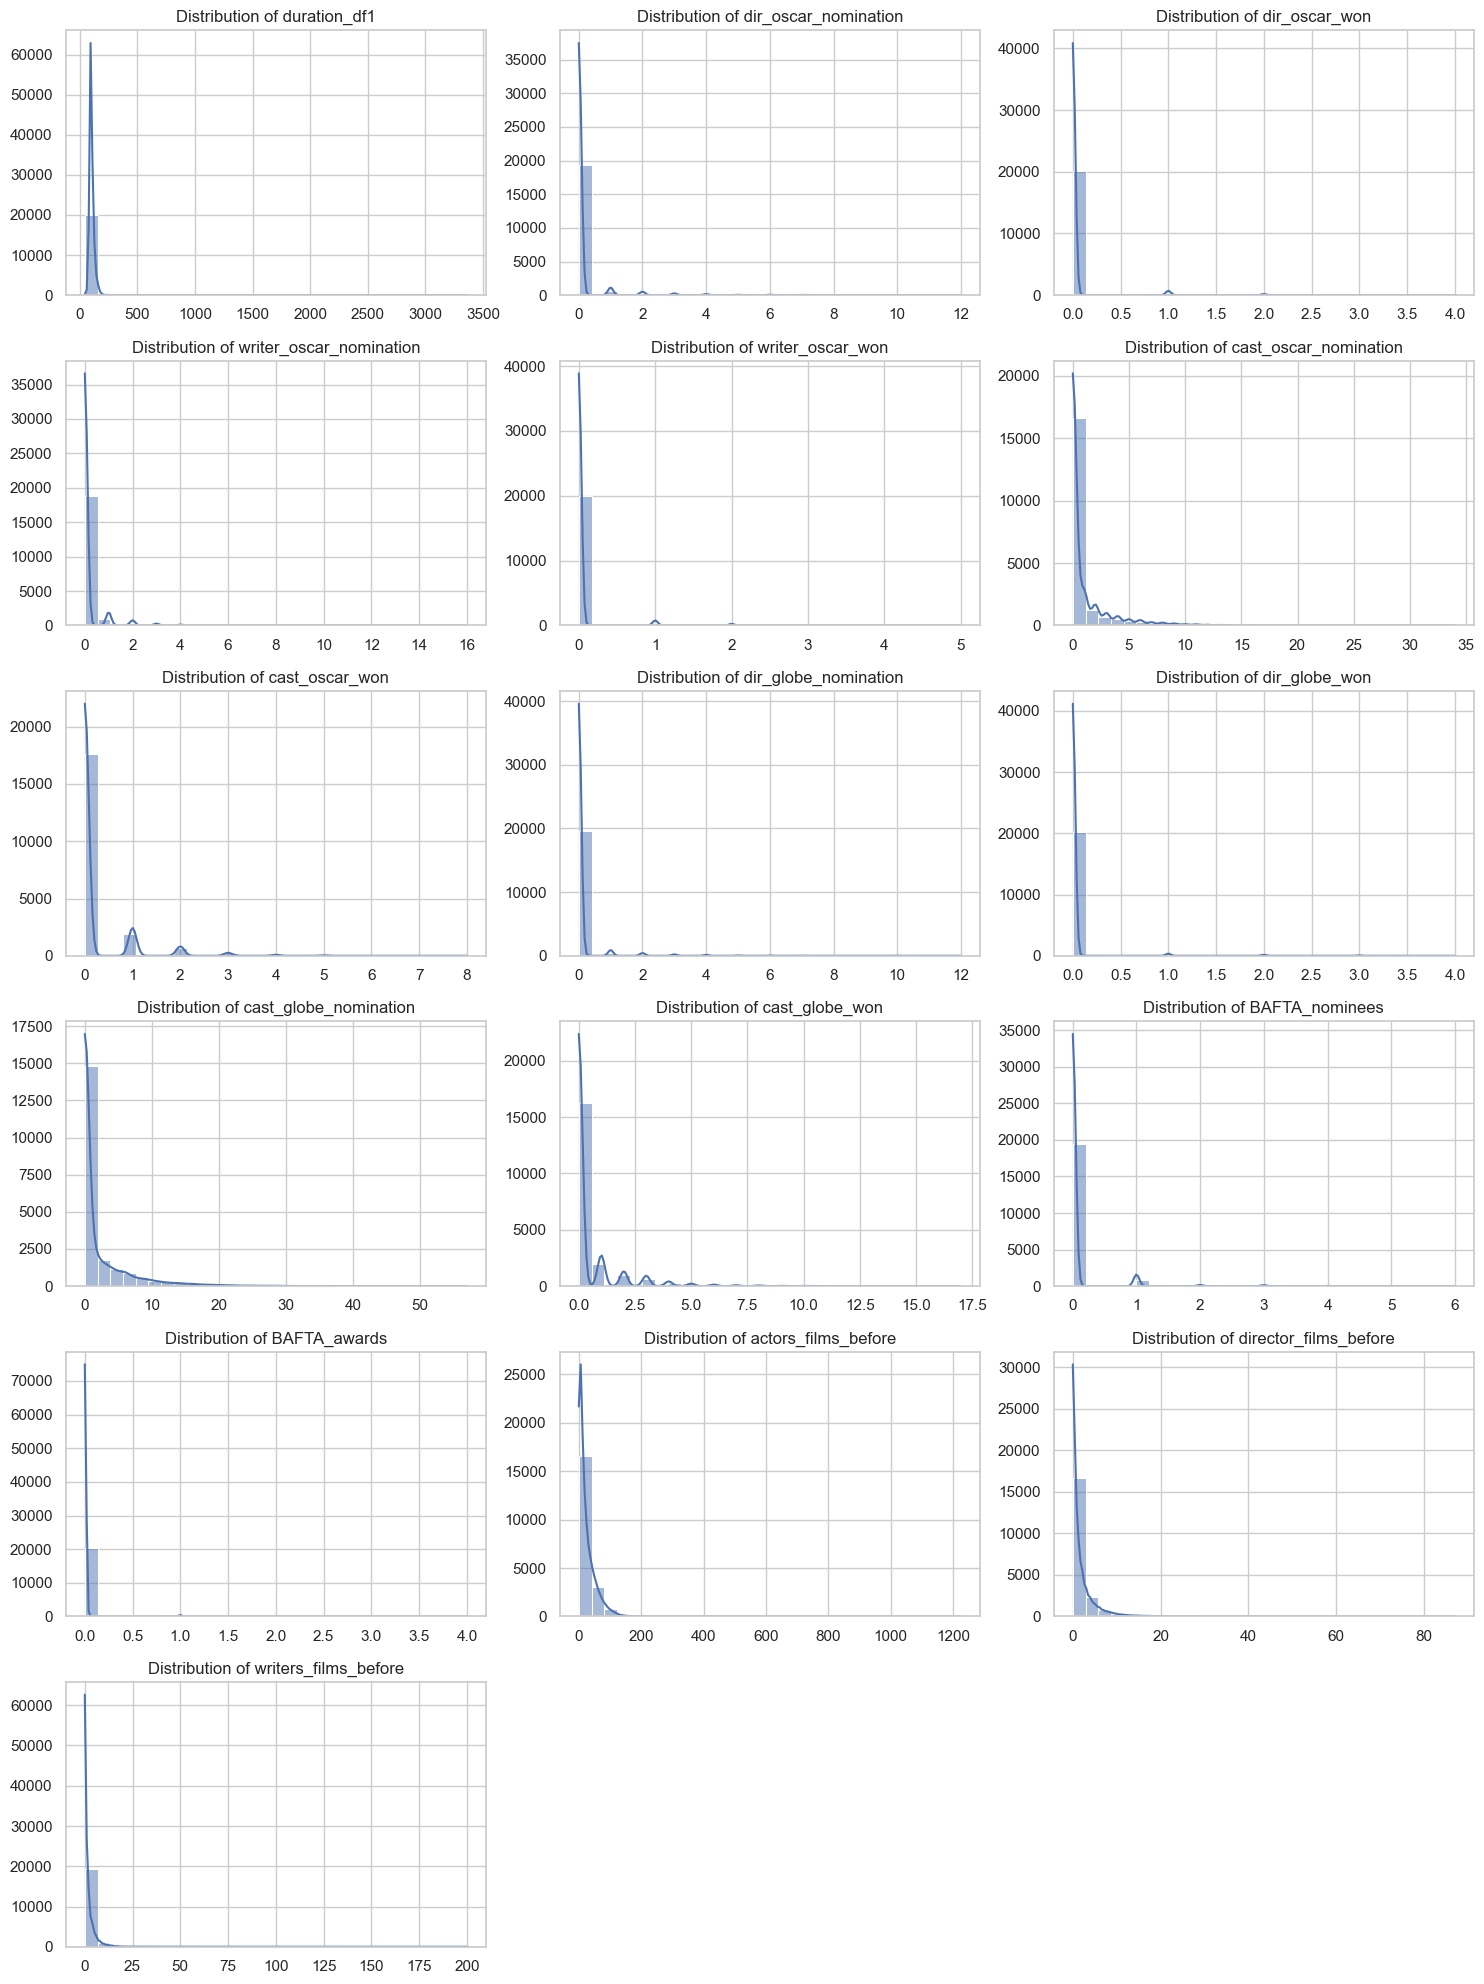

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista delle colonne numeriche
numerical_columns = ['duration_df1', 'dir_oscar_nomination', 'dir_oscar_won', 
                     'writer_oscar_nomination', 'writer_oscar_won', 
                     'cast_oscar_nomination', 'cast_oscar_won', 
                     'dir_globe_nomination', 'dir_globe_won', 
                     'cast_globe_nomination', 'cast_globe_won',
                     'BAFTA_nominees', 'BAFTA_awards',
                     'actors_films_before', 'director_films_before', 'writers_films_before']

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Crea una figura e un array di assi
fig, axes = plt.subplots(len(numerical_columns) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

# Visualizza le distribuzioni
for i, col in enumerate(numerical_columns):
    sns.histplot(df_selected[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Rimuovi eventuali assi vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [250]:
import numpy as np


# Seleziona le colonne rilevanti
columns_to_keep = [
    'genre', 'duration_df1','date_published', 'language', 'country', 'converted_budget',
    'dir_oscar_nomination', 'dir_oscar_won', 'writer_oscar_nomination',
    'BAFTA_nominees','BAFTA_awards','revenue_with_CPI',
    'writer_oscar_won', 'cast_oscar_nomination', 'cast_oscar_won',
    'dir_globe_nomination', 'dir_globe_won', 'production_company_df1',
    'cast_globe_nomination', 'cast_globe_won','actors_films_before','director_films_before', 'writers_films_before'
]

df_selected = df[columns_to_keep].dropna()
# Visualizza le prime righe del dataset selezionato
print(df_selected.head())

# Funzione per one-hot encoding su colonne con valori multipli separati da virgole
def multi_value_one_hot(df, column):
    s = df[column].str.get_dummies(sep=', ')
    return df.join(s.add_prefix(column + '_'))

# Converti 'date_published' in formato datetime
df_selected['date_published'] = pd.to_datetime(df_selected['date_published'], errors='coerce')

# Estrai il mese dalla colonna 'date_published'
df_selected['month_published'] = df_selected['date_published'].dt.month

# Rimuovi la colonna 'date_published'
df_selected.drop(columns=['date_published'], inplace=True)

# Applica one-hot encoding alle colonne 'genre'
df_selected = multi_value_one_hot(df_selected, 'genre')

# Rimuovi le colonne originali 'genre'
df_selected.drop(columns=['genre'], inplace=True)

# Rimuovi righe con NaN nella colonna 'converted_budget'
df_selected = df_selected.dropna(subset=['converted_budget'])
#df_selected = df_selected[df_selected['converted_budget'] != 0]

X = df_selected.drop('revenue_with_CPI', axis=1)
y = df_selected['revenue_with_CPI']
print(X.head())




                 genre  duration_df1 date_published language country  \
0         Crime, Drama          88.0     1913-11-24  English     USA   
1                Drama          59.0     1915-10-31  English     USA   
2  Drama, History, War          77.0     1915-11-14  English     USA   
3                Drama          50.0     1916-04-30  English     USA   
4     Adventure, Crime         300.0     1917-01-19   French  France   

   converted_budget  dir_oscar_nomination  dir_oscar_won  \
0          175700.3                     0              0   
1         3013850.0                     0              0   
2          521727.6                     0              0   
3         5598468.6                     0              0   
4        10802441.1                     0              0   

   writer_oscar_nomination  BAFTA_nominees  ...  cast_oscar_nomination  \
0                        0               0  ...                      0   
1                        0               0  ...           

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
import numpy as np
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisci le colonne categoriche
categorical_features = ['language', 'country', 'production_company_df1', 'month_published']
categorical_features += [col for col in X.columns if col.startswith('genre_')]





In [252]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
# Applica one-hot encoding alla colonna 'month_published'
X_train_resampled = pd.get_dummies(X_train, columns=['month_published'], prefix='month')
X_test = pd.get_dummies(X_test, columns=['month_published'], prefix='month')

# Mantieni solo le colonne dei mesi
month_columns = [col for col in X_train_resampled.columns if col.startswith('month_')]
X_train_resampled = X_train_resampled[month_columns + [col for col in X_train_resampled.columns if not col.startswith('month_')]]

month_columns = [col for col in X_test.columns if col.startswith('month_')]
X_test = X_test[month_columns + [col for col in X_test.columns if not col.startswith('month_')]]


# Applica one-hot encoding alle colonne 'genre', 'language', 'country' e 'production_company_df1'
X_train_resampled = multi_value_one_hot(X_train_resampled, 'language')
X_train_resampled = multi_value_one_hot(X_train_resampled, 'country')
X_train_resampled = multi_value_one_hot(X_train_resampled, 'production_company_df1')


X_test = multi_value_one_hot(X_test, 'language')
X_test = multi_value_one_hot(X_test, 'country')
X_test = multi_value_one_hot(X_test, 'production_company_df1')

# Rimuovi le colonne originali 'genre', 'language', 'country' e 'production_company_df1'
X_train_resampled.drop(columns=['language', 'country', 'production_company_df1'], inplace=True)
X_test.drop(columns=['language', 'country', 'production_company_df1'], inplace=True)


# Normalizzazione delle variabili numeriche
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['duration_df1','converted_budget',
                     'dir_oscar_nomination', 'dir_oscar_won', 
                     'writer_oscar_nomination', 'writer_oscar_won', 
                     'cast_oscar_nomination', 'cast_oscar_won', 
                     'dir_globe_nomination', 'dir_globe_won', 
                     'cast_globe_nomination', 'cast_globe_won',
                     'BAFTA_nominees','BAFTA_awards',
                     'actors_films_before', 'director_films_before', 'writers_films_before']

lambdas = {}
for col in numerical_columns:
    print(col)
    # La trasformazione di Box-Cox richiede valori positivi, aggiungi 1 se ci sono zeri o negativi
    X_train_resampled[col], lambdas[col] = stats.boxcox(X_train_resampled[col] + 1)
    X_test[col] = stats.boxcox(X_test[col]+1, lmbda=lambdas[col])
 
scaler = StandardScaler()

# Adatta lo scaler solo al training set e poi trasforma sia il training set che il test set
X_train_resampled[numerical_columns] = scaler.fit_transform(X_train_resampled[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


X_train_resampled, X_test = X_train_resampled.align(X_test, join='outer', axis=1, fill_value=0)

#X_train_resampled = X_train_resampled[selected_features_mi.to_list()]
#X_test = X_test[selected_features_mi.to_list()]

# Esegui la PCA solo sul set di training
#pca = PCA(n_components=10)  # Sostituisci 10 con il numero desiderato di componenti principali
#X_train_resampled = pca.fit_transform(X_train_resampled)
#X_test = pca.transform(X_test)  # Applica le stesse trasformazioni al set di test

y_train_transformed, lambda_train = stats.boxcox(y_train)
y_test_transformed = stats.boxcox(y_test, lmbda=lambda_train)

#y_train_transformed = np.log1p(y_train)
#y_test_transformed = np.log1p(y_test)



duration_df1
converted_budget
dir_oscar_nomination
dir_oscar_won
writer_oscar_nomination
writer_oscar_won
cast_oscar_nomination
cast_oscar_won
dir_globe_nomination
dir_globe_won
cast_globe_nomination
cast_globe_won
BAFTA_nominees
BAFTA_awards
actors_films_before
director_films_before
writers_films_before


In [253]:
from sklearn.ensemble import RandomForestRegressor

# Addestra un modello di Random Forest
rf = RandomForestRegressor(n_estimators=100,max_features=4, random_state=42)
rf.fit(X_train_resampled, y_train_transformed)

# Ottieni le importanze delle feature
importances = rf.feature_importances_

# Seleziona le feature con importanza sopra una soglia
threshold = np.percentile(importances, 75)  # Seleziona le feature nel top 25%
selected_features_rf = X_train_resampled.columns[importances >= threshold].tolist()

X_train_resampled = X_train_resampled[selected_features_rf]
X_test = X_test[selected_features_rf]
print("Selected features based on Random Forest importance:", selected_features_rf)


Selected features based on Random Forest importance: ['actors_films_before', 'cast_globe_nomination', 'cast_globe_won', 'cast_oscar_nomination', 'cast_oscar_won', 'converted_budget', 'country_USA', 'director_films_before', 'duration_df1', 'genre_Action', 'genre_Adventure', 'genre_Comedy', 'genre_Crime', 'genre_Drama', 'genre_Horror', 'genre_Romance', 'genre_Thriller', 'month_1', 'month_3', 'production_company_df1_Other', 'writer_oscar_nomination', 'writers_films_before']


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Addestra il modello Random Forest
rf_regressor = RandomForestRegressor(n_jobs=10, n_estimators=500, max_features=4)
rf_regressor.fit(X_train_resampled, y_train_transformed)

# Fai previsioni sui dati di test
y_pred_test = rf_regressor.predict(X_test)

# Fai previsioni sui dati di train
y_pred_train = rf_regressor.predict(X_train_resampled)

# Calcola le metriche di valutazione per il test set
mse_test = mean_squared_error(y_test_transformed, y_pred_test)
r2_test = r2_score(y_test_transformed, y_pred_test)
mae_test = mean_absolute_error(y_test_transformed, y_pred_test)

# Calcola le metriche di valutazione per il train set
mse_train = mean_squared_error(y_train_transformed, y_pred_train)
r2_train = r2_score(y_train_transformed, y_pred_train)
mae_train = mean_absolute_error(y_train_transformed, y_pred_train)

print(f'Test Set - MSE: {mse_test}')
print(f'Test Set - R²: {r2_test}')
print(f'Test Set - MAE: {mae_test}')

print(f'\nTrain Set - MSE: {mse_train}')
print(f'Train Set - R²: {r2_train}')
print(f'Train Set - MAE: {mae_train}')

from scipy.special import inv_boxcox

# Applica la trasformazione inversa ai valori previsti
y_pred_inverse = inv_boxcox(y_pred_test, lambda_train)
# Applica la trasformazione inversa ai valori effettivi
y_test_inverse = inv_boxcox(y_test_transformed, lambda_train)

# Calcola l'errore assoluto o l'errore quadratico medio tra i valori previsti invertiti e i valori effettivi invertiti
mae_inverse = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse_inverse = mean_squared_error(y_test_inverse, y_pred_inverse)

print(f'Mean Absolute Error (Inverse): {mae_inverse}')
print(f'Mean Squared Error (Inverse): {mse_inverse}')

Test Set - MSE: 98.92168603000495
Test Set - R²: 0.48684368327567107
Test Set - MAE: 7.753678804814782

Train Set - MSE: 13.30515790938691
Train Set - R²: 0.9322134891463819
Train Set - MAE: 2.8383965309040002
Mean Absolute Error (Inverse): 75094600.029116
Mean Squared Error (Inverse): 5.61667132755429e+16


In [255]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inizializza il modello MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Addestra il modello sul dataset di addestramento
mlp_regressor.fit(X_train_resampled, y_train_transformed)

# Fai previsioni sui dati di test
y_pred_test = mlp_regressor.predict(X_test)

# Fai previsioni sui dati di addestramento (opzionale)
y_pred_train = mlp_regressor.predict(X_train_resampled)

# Calcola le metriche di valutazione per il test set
mse_test = mean_squared_error(y_test_transformed, y_pred_test)
r2_test = r2_score(y_test_transformed, y_pred_test)
mae_test = mean_absolute_error(y_test_transformed, y_pred_test)

# Calcola le metriche di valutazione per il train set (opzionale)
mse_train = mean_squared_error(y_train_transformed, y_pred_train)
r2_train = r2_score(y_train_transformed, y_pred_train)
mae_train = mean_absolute_error(y_train_transformed, y_pred_train)

print(f'Test Set - MSE: {mse_test}')
print(f'Test Set - R²: {r2_test}')
print(f'Test Set - MAE: {mae_test}')

# Stampa le metriche di valutazione per il train set (opzionale)
print(f'\nTrain Set - MSE: {mse_train}')
print(f'Train Set - R²: {r2_train}')
print(f'Train Set - MAE: {mae_train}')

# Applica la trasformazione inversa ai valori previsti
y_pred_inverse = inv_boxcox(y_pred_test, lambda_train)
# Applica la trasformazione inversa ai valori effettivi
y_test_inverse = inv_boxcox(y_test_transformed, lambda_train)

# Calcola l'errore assoluto o l'errore quadratico medio tra i valori previsti invertiti e i valori effettivi invertiti
mae_inverse = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse_inverse = mean_squared_error(y_test_inverse, y_pred_inverse)

print(f'Mean Absolute Error (Inverse): {mae_inverse}')
print(f'Mean Squared Error (Inverse): {mse_inverse}')


Test Set - MSE: 102.93566434266963
Test Set - R²: 0.46602116792030646
Test Set - MAE: 7.8029480080244475

Train Set - MSE: 79.39722201598208
Train Set - R²: 0.595490659442952
Train Set - MAE: 6.850641057636758
Mean Absolute Error (Inverse): 72834945.79708275
Mean Squared Error (Inverse): 4.451646511584879e+16


C:\Users\BOLO\miniconda3\envs\Business\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [256]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.1)
gb_regressor.fit(X_train_resampled, y_train_transformed)
y_pred_test_gb = gb_regressor.predict(X_test)
y_pred_train_gb = gb_regressor.predict(X_train_resampled)

# Support Vector Machine Regressor
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_resampled, y_train_transformed)
y_pred_test_svr = svr_regressor.predict(X_test)
y_pred_train_svr = svr_regressor.predict(X_train_resampled)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_resampled, y_train_transformed)
y_pred_test_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train_resampled)

# Calcola le metriche di valutazione per il test set
mse_test_gb = mean_squared_error(y_test_transformed, y_pred_test_gb)
r2_test_gb = r2_score(y_test_transformed, y_pred_test_gb)
mae_test_gb = mean_absolute_error(y_test_transformed, y_pred_test_gb)

mse_test_svr = mean_squared_error(y_test_transformed, y_pred_test_svr)
r2_test_svr = r2_score(y_test_transformed, y_pred_test_svr)
mae_test_svr = mean_absolute_error(y_test_transformed, y_pred_test_svr)

mse_test_ridge = mean_squared_error(y_test_transformed, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test_transformed, y_pred_test_ridge)
mae_test_ridge = mean_absolute_error(y_test_transformed, y_pred_test_ridge)

# Calcola le metriche di valutazione per il train set
mse_train_gb = mean_squared_error(y_train_transformed, y_pred_train_gb)
r2_train_gb = r2_score(y_train_transformed, y_pred_train_gb)
mae_train_gb = mean_absolute_error(y_train_transformed, y_pred_train_gb)

mse_train_svr = mean_squared_error(y_train_transformed, y_pred_train_svr)
r2_train_svr = r2_score(y_train_transformed, y_pred_train_svr)
mae_train_svr = mean_absolute_error(y_train_transformed, y_pred_train_svr)

mse_train_ridge = mean_squared_error(y_train_transformed, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train_transformed, y_pred_train_ridge)
mae_train_ridge = mean_absolute_error(y_train_transformed, y_pred_train_ridge)

# Stampa le metriche di valutazione per il test set
print("Gradient Boosting Regressor:")
print(f'Test Set - MSE: {mse_test_gb}')
print(f'Test Set - R²: {r2_test_gb}')
print(f'Test Set - MAE: {mae_test_gb}')

print("\nSupport Vector Machine Regressor:")
print(f'Test Set - MSE: {mse_test_svr}')
print(f'Test Set - R²: {r2_test_svr}')
print(f'Test Set - MAE: {mae_test_svr}')

print("\nRidge Regression:")
print(f'Test Set - MSE: {mse_test_ridge}')
print(f'Test Set - R²: {r2_test_ridge}')
print(f'Test Set - MAE: {mae_test_ridge}')

# Stampa le metriche di valutazione per il train set
print("\nTrain Set - Gradient Boosting Regressor:")
print(f'Train Set - MSE: {mse_train_gb}')
print(f'Train Set - R²: {r2_train_gb}')
print(f'Train Set - MAE: {mae_train_gb}')

print("\nTrain Set - Support Vector Machine Regressor:")
print(f'Train Set - MSE: {mse_train_svr}')
print(f'Train Set - R²: {r2_train_svr}')
print(f'Train Set - MAE: {mae_train_svr}')

print("\nTrain Set - Ridge Regression:")
print(f'Train Set - MSE: {mse_train_ridge}')
print(f'Train Set - R²: {r2_train_ridge}')
print(f'Train Set - MAE: {mae_train_ridge}')



Gradient Boosting Regressor:
Test Set - MSE: 98.35695112715045
Test Set - R²: 0.4897732459863854
Test Set - MAE: 7.654872161401779

Support Vector Machine Regressor:
Test Set - MSE: 97.94798521180975
Test Set - R²: 0.4918947569634462
Test Set - MAE: 7.565207608683965

Ridge Regression:
Test Set - MSE: 104.43080303802462
Test Set - R²: 0.4582651348734408
Test Set - MAE: 7.893059767106807

Train Set - Gradient Boosting Regressor:
Train Set - MSE: 73.15309775083867
Train Set - R²: 0.6273029385720756
Train Set - MAE: 6.61007587656751

Train Set - Support Vector Machine Regressor:
Train Set - MSE: 95.05978015990028
Train Set - R²: 0.5156937735398475
Train Set - MAE: 7.4163479920340905

Train Set - Ridge Regression:
Train Set - MSE: 103.14642022432395
Train Set - R²: 0.4744943290665413
Train Set - MAE: 7.887729346287496


In [175]:
from sklearn.linear_model import Lasso, ElasticNet

# Addestramento del modello Lasso
lasso_regressor = Lasso(alpha=0.1)  # Sostituisci 0.1 con il valore desiderato di alpha
lasso_regressor.fit(X_train_resampled, y_train_transformed)
y_pred_test_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso = lasso_regressor.predict(X_train_resampled)

# Addestramento del modello Elastic Net
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Sostituisci 0.1 con il valore desiderato di alpha, l1_ratio con il valore desiderato di l1_ratio
elasticnet_regressor.fit(X_train_resampled, y_train_transformed)
y_pred_test_elasticnet = elasticnet_regressor.predict(X_test)
y_pred_train_elasticnet = elasticnet_regressor.predict(X_train_resampled)

# Calcolo delle metriche di valutazione per il test set per Lasso
mse_test_lasso = mean_squared_error(y_test_transformed, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test_transformed, y_pred_test_lasso)
mae_test_lasso = mean_absolute_error(y_test_transformed, y_pred_test_lasso)

# Calcolo delle metriche di valutazione per il test set per Elastic Net
mse_test_elasticnet = mean_squared_error(y_test_transformed, y_pred_test_elasticnet)
r2_test_elasticnet = r2_score(y_test_transformed, y_pred_test_elasticnet)
mae_test_elasticnet = mean_absolute_error(y_test_transformed, y_pred_test_elasticnet)

# Calcolo delle metriche di valutazione per il train set per Lasso
mse_train_lasso = mean_squared_error(y_train_transformed, y_pred_train_lasso)
r2_train_lasso = r2_score(y_train_transformed, y_pred_train_lasso)
mae_train_lasso = mean_absolute_error(y_train_transformed, y_pred_train_lasso)

# Calcolo delle metriche di valutazione per il train set per Elastic Net
mse_train_elasticnet = mean_squared_error(y_train_transformed, y_pred_train_elasticnet)
r2_train_elasticnet = r2_score(y_train_transformed, y_pred_train_elasticnet)
mae_train_elasticnet = mean_absolute_error(y_train_transformed, y_pred_train_elasticnet)

# Stampa delle metriche di valutazione
print("Lasso Regression:")
print(f'Test Set - MSE: {mse_test_lasso}')
print(f'Test Set - R²: {r2_test_lasso}')
print(f'Test Set - MAE: {mae_test_lasso}')
print(f'Train Set - MSE: {mse_train_lasso}')
print(f'Train Set - R²: {r2_train_lasso}')
print(f'Train Set - MAE: {mae_train_lasso}')

print("\nElastic Net Regression:")
print(f'Test Set - MSE: {mse_test_elasticnet}')
print(f'Test Set - R²: {r2_test_elasticnet}')
print(f'Test Set - MAE: {mae_test_elasticnet}')
print(f'Train Set - MSE: {mse_train_elasticnet}')
print(f'Train Set - R²: {r2_train_elasticnet}')
print(f'Train Set - MAE: {mae_train_elasticnet}')


Lasso Regression:
Test Set - MSE: 133.64439024136925
Test Set - R²: 0.3067196304526386
Test Set - MAE: 9.288149694533846
Train Set - MSE: 140.35398510316878
Train Set - R²: 0.28493092683761323
Train Set - MAE: 9.46634167245343

Elastic Net Regression:
Test Set - MSE: 133.82135642091677
Test Set - R²: 0.30580161827021546
Test Set - MAE: 9.320443047119031
Train Set - MSE: 140.458769837808
Train Set - R²: 0.2843970743572226
Train Set - MAE: 9.502918452399573


In [184]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Definisci il numero di fold per la cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

train_mses = []
train_r2_scores = []
train_maes = []

test_mses = []
test_r2_scores = []
test_maes = []

# Initialize the model
model = RandomForestRegressor(n_estimators=100, max_features=4, n_jobs=10)
model = AdaBoostRegressor(n_estimators=100, random_state=42)


# Definisci le colonne categoriche
categorical_features = ['language', 'country', 'production_company_df1', 'month_published']
categorical_features += [col for col in X.columns if col.startswith('genre_')]

rf_classifier = RandomForestClassifier(n_jobs=10, n_estimators=100, max_features=4)

# Loop attraverso i fold
for train_index, test_index in kf.split(X):
    # Dividi i dati in training e test set per il fold corrente
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    

    X_fold_resampled = pd.get_dummies(X_train_fold, columns=['month_published'], prefix='month')
    X_test_fold = pd.get_dummies(X_test_fold, columns=['month_published'], prefix='month')

    # Mantieni solo le colonne dei mesi
    month_columns = [col for col in X_fold_resampled.columns if col.startswith('month_')]
    X_fold_resampled = X_fold_resampled[month_columns + [col for col in X_fold_resampled.columns if not col.startswith('month_')]]

    month_columns = [col for col in X_test_fold.columns if col.startswith('month_')]
    X_test_fold = X_test_fold[month_columns + [col for col in X_test_fold.columns if not col.startswith('month_')]]


    # Applica one-hot encoding alle colonne 'genre', 'language', 'country' e 'production_company_df1'
    X_fold_resampled = multi_value_one_hot(X_fold_resampled, 'language')
    X_fold_resampled = multi_value_one_hot(X_fold_resampled, 'country')
    X_fold_resampled = multi_value_one_hot(X_fold_resampled, 'production_company_df1')


    X_test_fold = multi_value_one_hot(X_test_fold, 'language')
    X_test_fold = multi_value_one_hot(X_test_fold, 'country')
    X_test_fold = multi_value_one_hot(X_test_fold, 'production_company_df1')

    # Rimuovi le colonne originali 'genre', 'language', 'country' e 'production_company_df1'
    X_fold_resampled.drop(columns=['language', 'country', 'production_company_df1'], inplace=True)
    X_test_fold.drop(columns=['language', 'country', 'production_company_df1'], inplace=True)

    scaler = StandardScaler()
    numerical_columns = ['duration_df1', 'converted_budget',
                     'dir_oscar_nomination', 'dir_oscar_won', 
                     'writer_oscar_nomination', 'writer_oscar_won', 
                     'cast_oscar_nomination', 'cast_oscar_won', 
                     'dir_globe_nomination', 'dir_globe_won', 
                     'cast_globe_nomination', 'cast_globe_won',
                     'BAFTA_nominees','BAFTA_awards',
                     'actors_films_before', 'director_films_before', 'writers_films_before']
    
    X_fold_resampled[numerical_columns] = scaler.fit_transform(X_fold_resampled[numerical_columns])
    X_test_fold[numerical_columns] = scaler.fit_transform(X_test_fold[numerical_columns])

    X_fold_resampled, X_test_fold = X_fold_resampled.align(X_test_fold, join='outer', axis=1, fill_value=0)

    pca = PCA(n_components=10)  # Sostituisci 10 con il numero desiderato di componenti principali
    X_fold_resampled = pca.fit_transform(X_fold_resampled)
    X_test_fold = pca.transform(X_test_fold)  # Applica le stesse trasformazioni al set di test

    import numpy as np
    from scipy import stats

    y_fold_resampled, lambda_train = stats.boxcox(y_train_fold)
    y_test_fold = stats.boxcox(y_test_fold, lmbda=lambda_train)
    # Addestra il modello sui dati di training preprocessati e campionati
    model.fit(X_fold_resampled, y_fold_resampled)

    # Fai previsioni sui dati di test e train
    y_pred_test = model.predict(X_test_fold)
    y_pred_train = model.predict(X_fold_resampled)


    # Calcola le metriche di valutazione per il train set
    mse_train = mean_squared_error(y_fold_resampled, y_pred_train)
    r2_train = r2_score(y_fold_resampled, y_pred_train)
    mae_train = mean_absolute_error(y_fold_resampled, y_pred_train)

    # Calcola le metriche di valutazione per il test set
    mse_test = mean_squared_error(y_test_fold, y_pred_test)
    r2_test = r2_score(y_test_fold, y_pred_test)
    mae_test = mean_absolute_error(y_test_fold, y_pred_test)

    # Aggiungi le metriche ai rispettivi elenchi
    train_mses.append(mse_train)
    train_r2_scores.append(r2_train)
    train_maes.append(mae_train)

    test_mses.append(mse_test)
    test_r2_scores.append(r2_test)
    test_maes.append(mae_test)

# Calcola le medie delle metriche di valutazione su tutti i fold
mean_train_mse = np.mean(train_mses)
mean_train_r2 = np.mean(train_r2_scores)
mean_train_mae = np.mean(train_maes)

mean_test_mse = np.mean(test_mses)
mean_test_r2 = np.mean(test_r2_scores)
mean_test_mae = np.mean(test_maes)

# Stampa le metriche medie
print("Mean training MSE:", mean_train_mse)
print("Mean training R²:", mean_train_r2)
print("Mean training MAE:", mean_train_mae)

print("Mean test MSE:", mean_test_mse)
print("Mean test R²:", mean_test_r2)
print("Mean test MAE:", mean_test_mae)



Mean training MSE: 14.710463142672728
Mean training R²: 0.9262837009125138
Mean training MAE: 2.9667888885592264
Mean test MSE: 109.9329464191378
Mean test R²: 0.4489823792964097
Mean test MAE: 8.207290002898906
